<a href="https://colab.research.google.com/github/RachapalliMounvithaLakshmi/Unified-Mentor/blob/main/Covid_Clinical_Trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/COVID clinical trials.csv')

# Drop columns with too many missing values
df.drop(columns=['Results First Posted', 'Study Documents'], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing categorical data with 'Missing <feature>'
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        df[feature] = df[feature].fillna(f"Missing {feature}")

# Impute median for Enrollment column
df['Enrollment'] = df['Enrollment'].fillna(df['Enrollment'].median())

# Extract country from Locations
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notna(x) else 'Missing Location')

# Drop unique identifier columns
df.drop(columns=['NCT Number', 'URL'], inplace=True)

# Encode categorical columns using label encoding
le = LabelEncoder()
for feature in categorical_features:
    if feature in df.columns and df[feature].dtype == 'object':
        df[feature] = le.fit_transform(df[feature])

# Save cleaned dataset
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Assuming df is already cleaned and processed as per previous steps

# 1. Encode categorical features (again to ensure no missing values)
categorical_features = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in categorical_features:
    if feature in df.columns and df[feature].dtype == 'object':
        df[feature] = le.fit_transform(df[feature])

# 2. Define target and features
# Example target: 'Status' (can be changed based on analysis goal)
target = 'Status'

# Encode the target variable before splitting
if target in df.columns:
    le_target = LabelEncoder()
    df[target] = le_target.fit_transform(df[target])


X = df.drop(columns=[target, 'NCT Number', 'URL'], errors='ignore')  # Drop identifiers if still present
y = df[target]

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify

# 4. Initialize and train model - Random Forest Classifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Using weighted average for multi-class, added zero_division

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6258
Precision: 0.6078
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.02      0.04        92
           2       0.33      1.00      0.50         2
           3       0.61      0.19      0.29       213
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         3
           6       0.97      0.55      0.70       203
           7       0.58      0.97      0.73       561
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        16
          11       1.00      1.00      1.00        23

    accuracy                           0.63      1157
   macro avg       0.34      0.34      0.30      1157
weighted avg       0.61      0.63      0.55      1157



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:32:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

XGBoost Accuracy: 0.6500
XGBoost Precision: 0.6409
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.10      0.15       105
           2       0.50      0.50      0.50         4
           3       0.63      0.46      0.53       205
           4       0.67      0.06      0.10        36
           5       0.00      0.00      0.00         2
           6       0.86      0.57      0.68       201
           7       0.63      0.90      0.74       561
           8       0.00      0.00      0.00         6
           9       0.50      0.07      0.12        15
          10       0.84      0.95      0.89        22

    accuracy                           0.65      1157
   macro avg       0.50      0.36      0.37      1157
weighted avg       0.64      0.65      0.61      1157



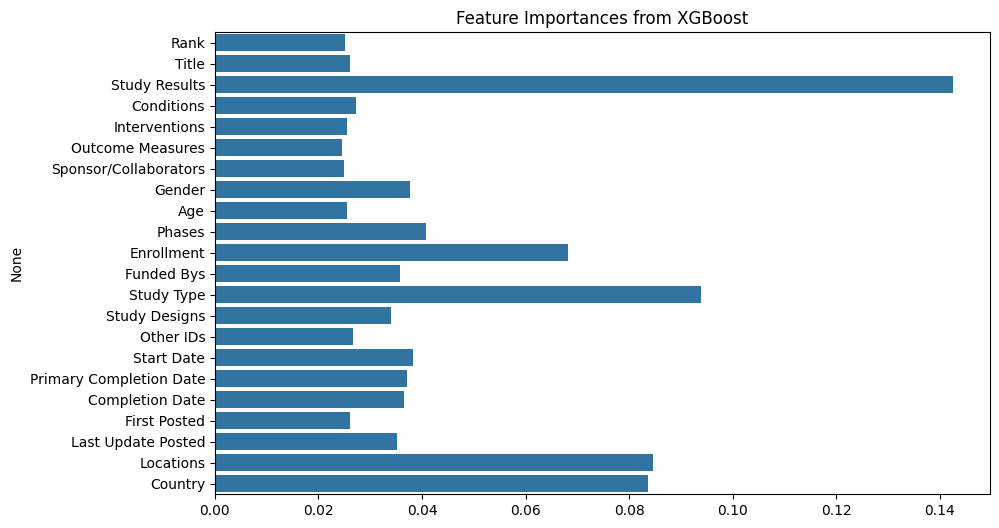

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/COVID clinical trials.csv')

# Drop columns with too many missing values
df.drop(['Results First Posted', 'Study Documents', 'Acronym'], axis=1, inplace=True)

# Impute missing categorical features with 'Missing' category
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col] = df[col].fillna(f'Missing {col}')

# Impute missing numerical feature 'Enrollment' with median
df['Enrollment'] = df['Enrollment'].fillna(df['Enrollment'].median())

# Extract 'Country' from 'Locations'
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notna(x) else 'Missing Location')

# Remove rare classes in target 'Status' to avoid train_test_split errors
status_counts = df['Status'].value_counts()
rare_status = status_counts[status_counts < 2].index
df = df[~df['Status'].isin(rare_status)]

# Encode categorical variables using Label Encoding
le = LabelEncoder()
for col in categorical_features:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Also encode the newly created 'Country' feature
df['Country'] = le.fit_transform(df['Country'])

# Define features and target
target = 'Status'
X = df.drop([target, 'NCT Number', 'URL'], axis=1, errors='ignore')
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Precision: {precision:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title('Feature Importances from XGBoost')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:34:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.33      0.02      0.04       105
           2       0.50      0.50      0.50         4
           3       0.59      0.23      0.33       205
           4       1.00      0.03      0.05        36
           5       0.00      0.00      0.00         2
           6       0.96      0.54      0.69       201
           7       0.58      0.96      0.72       561
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        15
          10       1.00      1.00      1.00        22

    accuracy                           0.62      1157
   macro avg       0.50      0.33      0.33      1157
weighted avg       0.63      0.62      0.55      1157


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.33      0.10      0.15       105
           2       0.50      0.50      0.50         4
           3       0.63      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

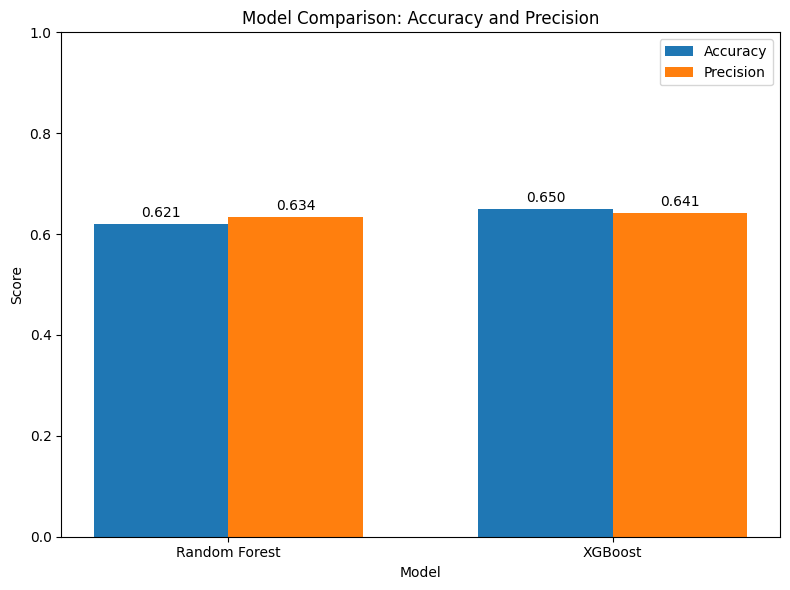

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/COVID clinical trials.csv')

# Drop columns with too many missing values
df.drop(['Results First Posted', 'Study Documents', 'Acronym'], axis=1, inplace=True)

# Impute missing categorical features with 'Missing' category
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col] = df[col].fillna(f'Missing {col}')

# Impute missing numerical feature Enrollment with median
df['Enrollment'] = df['Enrollment'].fillna(df['Enrollment'].median())

# Extract 'Country' from 'Locations'
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notna(x) else 'Missing Location')

# Remove rare classes in target 'Status' (less than 2 samples)
status_counts = df['Status'].value_counts()
rare_statuses = status_counts[status_counts < 2].index
df = df[~df['Status'].isin(rare_statuses)]

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_features:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Also encode the newly created 'Country' feature
df['Country'] = le.fit_transform(df['Country'])

# Define features and target
target = 'Status'
X = df.drop([target, 'NCT Number', 'URL'], axis=1, errors='ignore')
y = df[target]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Print classification reports
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

print("\nXGBoost Performance:")
print(classification_report(y_test, xgb_pred))

# Visualization of accuracy and precision
models = ['Random Forest', 'XGBoost']
accuracy_scores = [rf_accuracy, xgb_accuracy]
precision_scores = [rf_precision, xgb_precision]

fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.35
indices = np.arange(len(models))

bars1 = ax.bar(indices, accuracy_scores, bar_width, label='Accuracy')
bars2 = ax.bar(indices + bar_width, precision_scores, bar_width, label='Precision')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy and Precision')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()